In [1]:
import re
import pandas as pd
from ast import literal_eval
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tirta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
hadist = pd.read_csv("D:/RoadMap Kuliah/Semester 7/Quran Hadis Mining/tugasku/dataset hadist/hasil_musnad_syafii_vfix.csv")

In [3]:
hadist

,id,kitab,hasil_perawi,matan_inggris,terjemah,matan_indo
0,1,musnad_syafii,"['Imam Abu Abdullah', 'Muhammad bin Idris Asy'...",A man once asked the Messenger of Allah sallal...,Imam Abu Abdullah Muhammad bin Idris Asy-Syafi...,Seorang laki-laki pernah bertanya kepada Rasul...
1,2,musnad_syafii,"['Al WaJid bin Katsir', ""Muhamad bin Abbad bin...","""If the water reaches two qullahs, then it doe...",Orang yang terpercaya memberitahukan kepada ka...,"“Jika airnya mencapai dua qullah, maka tidak m..."
2,3,musnad_syafii,"['Malik', 'Abu Az-Zinad', ""Al-A'raj"", 'Abu Hur...","""If a dog drinks from a vessel among you, let ...",Malik mengabarkan kepada kami dari Abu Az-Zina...,“Jika seekor anjing minum dari bejana di antar...
3,4,musnad_syafii,"['Sufyan bin Uyainah', 'Abu Az-Zinad', ""Al A'r...","""If a dog licks someone among you, let him was...",Sufyan bin Uyainah mengabarkan kepada kami dar...,“Jika ada anjing yang menjilat seseorang di an...
4,5,musnad_syafii,"['Ibn Uyainah', 'Ayyub bin Abu Tamimah', 'Ibn ...","""When a dog licks someone among you in a bowl,...",Ibnu Uyainah memberitahukan kepada kami dari A...,“Apabila ada anjing yang menjilati salah satu ...
...,...,...,...,...,...,...
1795,1796,musnad_syafii,['Hisyam bin Urwah'],The Prophet sallallaahu 'alaihi wa sallam once...,Sufyan mengabarkan kepada kami dari Hisyam bin...,Nabi Shallallahu 'alaihi wa sallam pernah meme...
1796,1797,musnad_syafii,"['Sufyan', 'Hisyam bin Urwah']","'Aisha said, ""O my sister's daughter, have you...",Sufyan mengabarkan kepada kami dari Hisyam bin...,"'Aisha berkata, ""Wahai putri saudaraku, pernah..."
1797,1798,musnad_syafii,"['Ibn Ulayah', 'Abu Hamzah Maimun', 'Al Aswad'...",He (Abdullah bin Umar) always recommended the ...,Ibnu Ulayah mengabarkan kepada kami dari Abu H...,Beliau (Abdullah bin Umar) selalu menganjurkan...
1798,1799,musnad_syafii,"[""Muhammad bin Ali bin Syafi'"", 'Muhammad bin ...","""When I was with Uthman at his pile of possess...","Pamanku, Muhammad bin Ali bin Syafi' mengabark...",“Saat aku bersama Utsman di tumpukan harta mil...


In [4]:
hadist["hasil_perawi"]

0       ['Imam Abu Abdullah', 'Muhammad bin Idris Asy'...
1       ['Al WaJid bin Katsir', "Muhamad bin Abbad bin...
2       ['Malik', 'Abu Az-Zinad', "Al-A'raj", 'Abu Hur...
3       ['Sufyan bin Uyainah', 'Abu Az-Zinad', "Al A'r...
4       ['Ibn Uyainah', 'Ayyub bin Abu Tamimah', 'Ibn ...
                              ...                        
1795                                 ['Hisyam bin Urwah']
1796                       ['Sufyan', 'Hisyam bin Urwah']
1797    ['Ibn Ulayah', 'Abu Hamzah Maimun', 'Al Aswad'...
1798    ["Muhammad bin Ali bin Syafi'", 'Muhammad bin ...
1799              ['Ibn Uyainah', 'Abu Wail', 'Abdullah']
Name: hasil_perawi, Length: 1800, dtype: object

In [5]:
hadist['hasil_perawi'] = hadist['hasil_perawi'].apply(literal_eval)
hadist["hasil_perawi"]

0       [Imam Abu Abdullah, Muhammad bin Idris Asy, Ma...
1       [Al WaJid bin Katsir, Muhamad bin Abbad bin Ja...
2           [Malik, Abu Az-Zinad, Al-A'raj, Abu Hurairah]
3       [Sufyan bin Uyainah, Abu Az-Zinad, Al A'raj, A...
4       [Ibn Uyainah, Ayyub bin Abu Tamimah, Ibn Sirin...
                              ...                        
1795                                   [Hisyam bin Urwah]
1796                           [Sufyan, Hisyam bin Urwah]
1797    [Ibn Ulayah, Abu Hamzah Maimun, Al Aswad, Abdu...
1798    [Muhammad bin Ali bin Syafi', Muhammad bin Ali...
1799                    [Ibn Uyainah, Abu Wail, Abdullah]
Name: hasil_perawi, Length: 1800, dtype: object

### WORDCLOUD

c:\Users\Tirta\anaconda3\envs\tensorflow\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


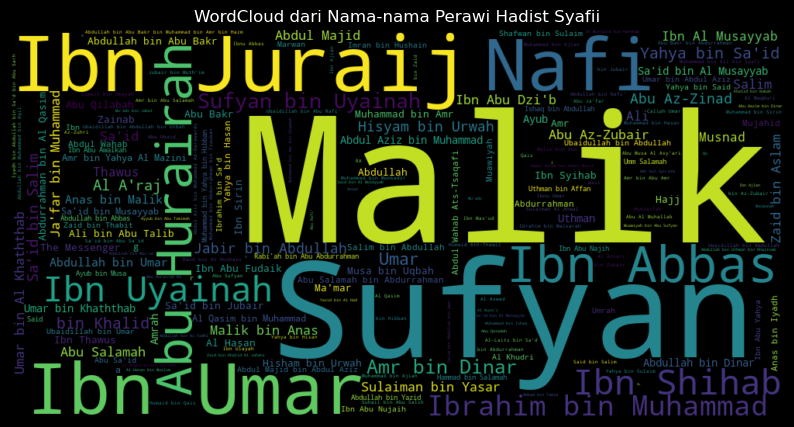

In [6]:
semua_perawi = [nama for list in hadist['hasil_perawi'] for nama in list]
semua_perawi = [nama for nama in semua_perawi if nama != 'the Messenger of Allah']

word_could_dict = Counter(semua_perawi)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(10, 8), facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Nama-nama Perawi Hadist Syafii', color='white')
plt.show()

In [7]:
top_5 = word_could_dict.most_common(5)
print("5 nama yang paling sering muncul:")
for nama, count in top_5:
    print(f"{nama}: {count} kali")

5 nama yang paling sering muncul:
Malik: 505 kali
Sufyan: 258 kali
Ibn Juraij: 193 kali
Nafi: 165 kali
Ibn Umar: 163 kali


### TOP 1 Perawi : Malik

In [8]:
matan = []
idx = []

for index, perawi in enumerate(hadist['hasil_perawi']):
    if 'Malik' in perawi:
        matan.append(hadist['matan_indo'][index])
        idx.append(index)

data_malik = {'id': idx, 'matan': matan}
df_malik = pd.DataFrame(data_malik)

print("DataFrame Matan yang berisi perawi terkait dengan 'Malik':")
df_malik

DataFrame Matan yang berisi perawi terkait dengan 'Malik':


,id,matan
0,2,“Jika seekor anjing minum dari bejana di antar...
1,7,Seorang wanita pernah bertanya kepada Rasulull...
2,9,"Abu Qatadah masuk, lalu aku menuangkan air (me..."
3,12,“Sesungguhnya laki-laki dan perempuan pada zam...
4,13,“Saya pernah mandi bersama Rasulullah Shallall...
...,...,...
497,1781,Rasulullah Shallallahu 'alaihi wa sallam menun...
498,1782,Seorang laki-laki bertanya kepada Rasulullah S...
499,1789,"Ibnu 'Umar mendatangi Dzat An-Nushb, lalu beli..."
500,1793,Beliau melakukan takbir pada An-Najasyi sebany...


In [9]:
df_malik["matan"][0]

'“Jika seekor anjing minum dari bejana di antara kamu, hendaklah dia mencucinya tujuh kali.”'

In [10]:
df_malik['matan_processed'] = df_malik['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))
df_malik['matan_processed'] = df_malik['matan_processed'].map(lambda x: x.lower())
df_malik['matan_processed'].head()

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
C:\Users\Tirta\AppData\Local\Temp\ipykernel_14856\1697034792.py:1: DeprecationWarning: invalid escape sequence \.
  df_malik['matan_processed'] = df_malik['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))


0    jika seekor anjing minum dari bejana di antara...
1    seorang wanita pernah bertanya kepada rasulull...
2    abu qatadah masuk lalu aku menuangkan air memp...
3    sesungguhnya laki-laki dan perempuan pada zama...
4    saya pernah mandi bersama rasulullah shallalla...
Name: matan_processed, dtype: object

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_malik['matan_processed'].tolist()    
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30]) 

['seekor', 'anjing', 'minum', 'bejana', 'mencucinya', 'tujuh', 'kali']


In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [13]:
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"rasulullah" + 0.018*"nabi" + 0.017*"beliau" + 0.016*"umar" + '
  '0.014*"laki" + 0.013*"bin" + 0.011*"shalat" + 0.008*"orang" + '
  '0.008*"sesungguhnya" + 0.007*"wanita"'),
 (1,
  '0.027*"laki" + 0.014*"rasulullah" + 0.011*"allah" + 0.011*"shalat" + '
  '0.009*"rakaat" + 0.007*"bin" + 0.007*"sesungguhnya" + 0.007*"nabi" + '
  '0.006*"abu" + 0.005*"ibnu"'),
 (2,
  '0.027*"orang" + 0.027*"rasulullah" + 0.013*"bin" + 0.011*"sesungguhnya" + '
  '0.011*"abu" + 0.011*"allah" + 0.009*"beliau" + 0.008*"umar" + 0.007*"laki" '
  '+ 0.007*"al"')]


In [14]:
pyLDAvis.enable_notebook()

# Check if the directory exists or create it if necessary
directory_path = 'D:/RoadMap Kuliah/Semester 7/Quran Hadis Mining/tugasku/results/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

LDAvis_data_filepath = os.path.join(directory_path, 'ldavis_Malik_' + str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

output_html_path = os.path.join(directory_path, 'ldavis_Malik_' + str(num_topics) + '.html')
pyLDAvis.save_html(LDAvis_prepared, output_html_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.041602  0.036730       1        1  39.976719
0      0.014746 -0.050604       2        1  35.906533
1     -0.056348  0.013874       3        1  24.116747, topic_info=       Term        Freq       Total Category  logprob  loglift
58     laki  137.000000  137.000000  Default  30.0000  30.0000
83    orang  138.000000  138.000000  Default  29.0000  29.0000
272  rakaat   33.000000   33.000000  Default  28.0000  28.0000
19     nabi   97.000000   97.000000  Default  27.0000  27.0000
25   shalat   79.000000   79.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
187    umar   10.701787   92.338154   Topic3  -5.3499  -0.7328
158   salat    7.683363   32.842852   Topic3  -5.6813  -0.0304
105      al    8.415226   53.992993   Topic3  -5.5903  -0.4365
83    orang    9.895588  138.755721   Topic3  -5.4282  -1.2184
33   beliau    8.672366   99.085063   Topic3  -5.5602  -1.0136

[249 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
239       1  0.518672  abdullah
239       2  0.359081  abdullah
239       3  0.119694  abdullah
31        1  0.562875       abu
31        2  0.274893       abu
...     ...       ...       ...
653       1  0.654172      zaid
653       2  0.218057      zaid
653       3  0.072686      zaid
674       2  0.260044  zakatnya
674       3  0.780131  zakatnya

[371 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

### Top 3 Tema Pada Perawi Malik
1. Talak atau Tentang Pernikahan
2. Waktu Sholat
3. Sholat

### Bibliography Perawi Malik
    Perawi Malik atau dikenal Malik bin Anas, atau lebih dikenal sebagai Imam Malik, adalah seorang ulama besar dalam sejarah Islam

    Tempat Lahir: Imam Malik lahir di Madinah, Arab Saudi pada tahun 711 Masehi.

    Masa Hidup: Imam Malik hidup dari tahun 711 M hingga 795 M, ketika beliau wafat.

    Berapa Lama Tahun Bersama Rasulullah: Imam Malik tidak sempat bertemu langsung dengan Nabi Muhammad SAW karena beliau lahir setelah wafatnya Nabi. Namun, Imam Malik hidup pada masa tabi'in, yaitu generasi Muslim yang hidup setelah masa Nabi Muhammad dan mengenal para sahabat beliau. Imam Malik mendapatkan banyak pengetahuan dari murid-murid sahabat dan generasi tabi'in.

    Hidup pada Masa Khalifah Siapa: Imam Malik hidup pada masa kekhalifahan Abbasiyah, terutama pada masa pemerintahan Khalifah Al-Mansur dan Khalifah Al-Mahdi.

    Tidak ada informasi yang secara khusus menyatakan bahwa Imam Malik memegang jabatan resmi di pemerintahan Khalifah Al-Mansur atau Khalifah Al-Mahdi. Imam Malik terkenal sebagai seorang ulama besar, cendekiawan, dan ahli fikih yang tinggal di Madinah.

    Imam Malik dikenal sebagai figur yang dihormati di kalangan ulama dan masyarakat pada masa itu, namun tidak secara langsung terlibat dalam administrasi pemerintahan atau memiliki jabatan resmi di kekhalifahan Abbasiyah pada masa Al-Mansur atau Al-Mahdi.

### Revelansi Tema dengan Bibliography Perawi Malik
Menurut saya 3 tema pembahasan yang ada pada Hadist musnad syafii sangat relevan dengan Bibliography Perawi Malik karena Perawi Malik ini dikenal sebagai ulama besar dalam sejarah Islam dan ahli fikih dimana beliau mengerti bagaimana tentang talak atau pernikahan, sholat, dan waktu sholat.

### TOP 2 Perawi : Sufyan

In [15]:
matan = []
idx = []

for index, perawi in enumerate(hadist['hasil_perawi']):
    if 'Sufyan' in perawi:
        matan.append(hadist['matan_indo'][index])
        idx.append(index)

data_sufyan = {'id': idx, 'matan': matan}
df_sufyan = pd.DataFrame(data_sufyan)

print("DataFrame Matan yang berisi perawi terkait dengan 'Sufyan':")
df_sufyan

DataFrame Matan yang berisi perawi terkait dengan 'Sufyan':


,id,matan
0,11,Rasulullah Shallallahu 'alaihi wa sallam perna...
1,15,Beliau berkata: “Aku sering mandi bersama Rasu...
2,27,Seorang laki-laki mengadu kepada Nabi Shallall...
3,35,"Rasulullah pernah memakan paha kambing, lalu s..."
4,37,Abu Wajzah meriwayatkan kepadaku dari Umran bi...
...,...,...
250,1775,Abdurrahman bin Auf membeli seorang budak pere...
251,1776,“Jika seorang budak perempuan salah satu kalia...
252,1777,"Dahulu, Rasulullah Shallallahu 'alaihi wa sall..."
253,1783,sesuatu yang serupa.


In [16]:
df_sufyan["matan"][0]

"Rasulullah Shallallahu 'alaihi wa sallam pernah mandi dari satu bejana dan saya pun mandi bersamanya dari satu bejana."

In [17]:
df_sufyan['matan'] = df_sufyan['matan'].astype(str)
df_sufyan['matan_processed'] = df_sufyan['matan'].apply(lambda x: re.sub(r"[,\.!?“”'()]", '', x))
df_sufyan['matan_processed'] = df_sufyan['matan_processed'].str.lower()
df_sufyan['matan_processed'].head()

0    rasulullah shallallahu alaihi wa sallam pernah...
1    beliau berkata: aku sering mandi bersama rasul...
2    seorang laki-laki mengadu kepada nabi shallall...
3    rasulullah pernah memakan paha kambing lalu sh...
4    abu wajzah meriwayatkan kepadaku dari umran bi...
Name: matan_processed, dtype: object

In [18]:
data = df_sufyan['matan_processed'].tolist()    
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30]) 

['rasulullah', 'shallallahu', 'alaihi', 'wa', 'sallam', 'mandi', 'bejana', 'mandi', 'bersamanya', 'bejana']


In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1)]


In [20]:
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.024*"laki" + 0.023*"rasulullah" + 0.014*"nabi" + 0.014*"bin" + '
  '0.010*"sesungguhnya" + 0.010*"allah" + 0.010*"orang" + 0.009*"bersabda" + '
  '0.009*"abu" + 0.008*"beliau"'),
 (1,
  '0.028*"orang" + 0.014*"rasulullah" + 0.012*"nabi" + 0.012*"laki" + '
  '0.010*"allah" + 0.008*"shalat" + 0.008*"bin" + 0.007*"bersabda" + '
  '0.006*"sesungguhnya" + 0.006*"rakaat"'),
 (2,
  '0.016*"nabi" + 0.015*"orang" + 0.014*"beliau" + 0.014*"rasulullah" + '
  '0.011*"ibnu" + 0.008*"mendengar" + 0.007*"umar" + 0.007*"al" + '
  '0.007*"shalat" + 0.007*"allah"')]


In [21]:
pyLDAvis.enable_notebook()

# Check if the directory exists or create it if necessary
directory_path = 'D:/RoadMap Kuliah/Semester 7/Quran Hadis Mining/tugasku/results/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

LDAvis_data_filepath = os.path.join(directory_path, 'ldavis_sufyan_' + str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

output_html_path = os.path.join(directory_path, 'ldavis_sufyan_' + str(num_topics) + '.html')
pyLDAvis.save_html(LDAvis_prepared, output_html_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.058719  0.014158       1        1  40.513976
1      0.015649 -0.052555       2        1  33.528769
2      0.043070  0.038398       3        1  25.957255, topic_info=          Term       Freq      Total Category  logprob  loglift
80       orang  72.000000  72.000000  Default  30.0000  30.0000
8       beliau  36.000000  36.000000  Default  29.0000  29.0000
15        laki  64.000000  64.000000  Default  28.0000  28.0000
17   mendengar  16.000000  16.000000  Default  27.0000  27.0000
632       beli   5.000000   5.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
15        laki   5.835732  64.297089   Topic3  -5.2330  -1.0508
113     wanita   4.245662  20.200524   Topic3  -5.5511  -0.2111
340      hadis   3.469178   9.273896   Topic3  -5.7531   0.3654
337       unta   3.988093  19.358033   Topic3  -5.6137  -0.2311
118     rakaat   3.672226  15.135024   Topic3  -5.6962  -0.0675

[235 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
122       1  0.325639        abbas
122       2  0.195384        abbas
122       3  0.521023        abbas
786       1  0.599292  abdurrahman
786       2  0.239717  abdurrahman
...     ...       ...          ...
274       2  0.353411           ya
274       3  0.058902           ya
866       2  0.538383        yazid
866       3  0.358922        yazid
1525      1  0.753779         zina

[303 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Top 3 Tema Pada Perawi Sufyan
1. Zina
2. Lebih Tentang Untuk Perempuan Seperti Haid, Menyusui, Suami, Mahram
3. Haram, beli, Mabuk

### Bibliography Perawi Sufyan 
    Sufyan atau Sufyan bin 'Uyainah adalah seorang perawi hadis yang terkenal dalam tradisi Islam. 

    Tempat dan Tanggal Lahir: Sufyan bin 'Uyainah lahir di Mekkah sekitar tahun 725 Masehi.

    Masa Hidup: Beliau hidup pada abad kedua Hijriyah dan wafat sekitar tahun 814 Masehi.

    Berapa Lama Tahun Bersama Rasulullah: Sufyan tidak sempat bertemu langsung dengan Nabi Muhammad SAW karena beliau lahir setelah wafatnya Nabi. 

    Kehidupan pada Masa Khalifah: Sufyan bin 'Uyainah hidup pada masa kekhalifahan Abbasiyah, terutama pada masa beberapa khalifah Abbasiyah, seperti Khalifah Al-Mansur dan Khalifah Al-Mahdi. Namun, tidak ada catatan sejarah yang secara spesifik menyatakan bahwa dia memegang jabatan resmi di pemerintahan atau memiliki keterlibatan politik yang signifikan pada masa itu.

    Sufyan bin 'Uyainah adalah seorang ulama dan perawi hadis yang dihormati pada zamannya. Beliau dikenal karena kecermatannya dalam meriwayatkan hadis dan memiliki otoritas dalam bidang hadis. Riwayat-riwayat hadis yang disampaikan olehnya termasuk dalam kategori yang dihormati oleh para ulama hadis dan ahli fikih.

### Revelansi Tema dengan Bibliography Perawi Sufyan
Menurut saya 3 tema pembahasan yang ada pada Hadist musnad syafii sangat relevan dengan Bibliography Perawi Sufyan karena Beliau tentu paham bagaimana tradisi Islam Walaupun beliau tidak pernah bertemu dengan Nabi akan tetapi  beliau seorang ulama dan perawi hadis yang dihormati pada zamanny yang dikenal dengan sifatnya yang cermat dalam meriwayatkan hadis dan memiliki otoritas dalam bidang hadis

### TOP 3 Perawi : Ibn Juraij

In [22]:
matan = []
idx = []

for index, perawi in enumerate(hadist['hasil_perawi']):
    if 'Ibn Juraij' in perawi:
        matan.append(hadist['matan_indo'][index])
        idx.append(index)

data_IbnJuraij = {'id': idx, 'matan': matan}
df_IbnJuraij = pd.DataFrame(data_IbnJuraij)

print("DataFrame Matan yang berisi perawi terkait dengan 'Ibn Juraij':")
df_IbnJuraij

DataFrame Matan yang berisi perawi terkait dengan 'Ibn Juraij':


,id,matan
0,43,"Rasulullah SAW berwudhu, lalu melepas sorbanny..."
1,53,“Rasulullah SAW buang air besar di balik tembo...
2,84,Saya pernah melihat Rasulullah SAW menunaikan ...
3,87,'Kamu boleh menunaikan shalat qashar jika kamu...
4,120,Sedangkan beliau adalah anak yatim piatu yang ...
...,...,...
185,1733,: Nabi melarang pernikahan syighar. Malik dala...
186,1735,“Sesungguhnya Aku akan memasukkan ke dalam kam...
187,1736,“Menurutku itu adalah mahar yang cocok.” Belia...
188,1737,Bintu Hafsh bin Mughirah menjadi istri Abdulla...


In [23]:
df_IbnJuraij["matan"][0]

'Rasulullah SAW berwudhu, lalu melepas sorbannya dan mengusap bagian depan kepalanya, -atau katanya- ubun-ubun kepalanya dengan air.'

In [24]:
df_IbnJuraij['matan'] = df_IbnJuraij['matan'].astype(str)
df_IbnJuraij['matan_processed'] = df_IbnJuraij['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))
df_IbnJuraij['matan_processed'] = df_IbnJuraij['matan_processed'].map(lambda x: x.lower())
df_IbnJuraij['matan_processed'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
C:\Users\Tirta\AppData\Local\Temp\ipykernel_14856\606561708.py:2: DeprecationWarning: invalid escape sequence \.
  df_IbnJuraij['matan_processed'] = df_IbnJuraij['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))


0    rasulullah saw berwudhu lalu melepas sorbannya...
1    rasulullah saw buang air besar di balik tembok...
2    saya pernah melihat rasulullah saw menunaikan ...
3    kamu boleh menunaikan shalat qashar jika kamu ...
4    sedangkan beliau adalah anak yatim piatu yang ...
Name: matan_processed, dtype: object

In [25]:
data = df_IbnJuraij['matan_processed'].tolist()    
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30]) 

['rasulullah', 'saw', 'berwudhu', 'melepas', 'sorbannya', 'mengusap', 'kepalanya', 'ubun', 'ubun', 'kepalanya', 'air']


In [26]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2)]


In [27]:
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"orang" + 0.014*"ibnu" + 0.012*"beliau" + 0.010*"nabi" + 0.010*"umar" '
  '+ 0.009*"menunaikan" + 0.008*"allah" + 0.008*"rasulullah" + 0.008*"haji" + '
  '0.008*"al"'),
 (1,
  '0.024*"laki" + 0.020*"orang" + 0.012*"nabi" + 0.011*"rasulullah" + '
  '0.010*"beliau" + 0.010*"allah" + 0.009*"umar" + 0.009*"ibnu" + '
  '0.008*"shalat" + 0.008*"bin"'),
 (2,
  '0.019*"bin" + 0.019*"rasulullah" + 0.016*"laki" + 0.015*"orang" + '
  '0.014*"ibnu" + 0.014*"beliau" + 0.010*"abu" + 0.009*"nabi" + '
  '0.009*"abdullah" + 0.008*"abbas"')]


In [28]:
pyLDAvis.enable_notebook()

# Check if the directory exists or create it if necessary
directory_path = 'D:/RoadMap Kuliah/Semester 7/Quran Hadis Mining/tugasku/results/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

LDAvis_data_filepath = os.path.join(directory_path, 'ldavis_IbnJuraij_' + str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

output_html_path = os.path.join(directory_path, 'ldavis_IbnJuraij_' + str(num_topics) + '.html')
pyLDAvis.save_html(LDAvis_prepared, output_html_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.055714  0.019493       1        1  48.010898
1     -0.005752 -0.046594       2        1  26.733306
0     -0.049962  0.027101       3        1  25.255796, topic_info=           Term       Freq      Total Category  logprob  loglift
381        laki  59.000000  59.000000  Default  30.0000  30.0000
81   menunaikan  15.000000  15.000000  Default  29.0000  29.0000
60        orang  64.000000  64.000000  Default  28.0000  28.0000
84        allah  28.000000  28.000000  Default  27.0000  27.0000
525      wanita  12.000000  12.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
546       ihram   4.221364  21.752747   Topic3  -5.4715  -0.2635
25          bin   4.716533  49.210250   Topic3  -5.3606  -0.9689
261       abbas   4.026008  24.135013   Topic3  -5.5189  -0.4148
6           saw   3.899676  21.210443   Topic3  -5.5508  -0.3175
381        laki   3.938947  59.170218   Topic3  -5.5408  -1.3334

[217 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
261       1  0.662937     abbas
261       2  0.165734     abbas
261       3  0.165734     abbas
955       1  0.815763      abdu
100       1  0.802849  abdullah
...     ...       ...       ...
208       1  0.661952        ya
208       2  0.141847        ya
208       3  0.189129        ya
348       1  0.685698    zubair
348       2  0.195914    zubair

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### Top 3 Tema Pada Perawi Ibnu Juraij
1. Menceritakan pada Masa KeKekhalifahan Berpergian 
2. Sholat
3. Umrah

### Bibliography Perawi Ibn Juraij atau Ibnu Juraij
    Ibnu Juraij, yang nama lengkapnya adalah Abdur Rahman bin Abi Bakr bin Muhammad bin Hazm bin 'Abdullah bin Juraij, adalah seorang ulama besar dan tabi'in terkemuka dalam sejarah Islam

    Tempat dan Tanggal Lahir: Ibnu Juraij lahir di Madinah pada tahun 80 Hijriyah (sekitar tahun 699 Masehi).

    Masa Hidup: Beliau hidup pada abad pertama Hijriyah dan wafat sekitar tahun 150 H (sekitar tahun 767 M).

    Hubungan dengan Nabi Muhammad SAW: Ibnu Juraij adalah bagian dari generasi tabi'in, yang berarti bahwa beliau hidup setelah masa Nabi Muhammad SAW. Meskipun tidak ada catatan khusus yang menyebutkan bahwa Ibnu Juraij secara langsung bertemu dengan Nabi Muhammad SAW, beliau belajar dan menerima pengetahuan agama dari para sahabat Nabi yang merupakan guru-gurunya.

    Ibnu Juraij hidup pada masa kekhalifahan Umayyah. Namun, tidak ada informasi yang spesifik yang menetapkan bahwa Ibnu Juraij memiliki hubungan atau keterlibatan langsung dalam pemerintahan khalifah pada masa itu

    bnu Juraij dikenal sebagai salah satu ulama terkemuka dalam bidang hadis, fikih, dan sejarah Islam. Beliau memiliki reputasi yang sangat baik dalam hal kecermatannya dalam meriwayatkan hadis dan pengetahuan luasnya tentang agama Islam. Karya-karyanya dalam bidang fikih dan hadis dihormati dan digunakan oleh ulama pada masa berikutnya.

### Revelansi Tema dengan Bibliography Perawi Ibnu Juraij
Menurut saya 3 tema pembahasan yang ada pada Hadist musnad syafii sangat relevan dengan Bibliography Perawi Ibnu Juraij dikenal memiliki reputasi yang sangat baik dalam hal kecermatannya dalam meriwayatkan hadis dan pengetahuan luasnya tentang agama islam maka beliau tau betul tentang Masa Khalifah, sholat, dan Umrah

### TOP 4 Perawi : Nafi

In [29]:
matan = []
idx = []

for index, perawi in enumerate(hadist['hasil_perawi']):
    if 'Nafi' in perawi:
        matan.append(hadist['matan_indo'][index])
        idx.append(index)

data_Nafi = {'id': idx, 'matan': matan}
df_Nafi = pd.DataFrame(data_Nafi)

print("DataFrame Matan yang berisi perawi terkait dengan 'Nafi':")
df_Nafi

DataFrame Matan yang berisi perawi terkait dengan 'Nafi':


,id,matan
0,25,"dia pernah tidur sambil duduk, lalu shalat tan..."
1,28,Ada seorang laki-laki yang bertemu Nabi Shalla...
2,48,"'dia berwudhu di pasar. Untuk melakukan ini, d..."
3,66,dia telah tiba dari Al Jurf. Sesampainya di Ma...
4,73,Bahwa Rasulullah memasuki Ka'bah diiringi Bila...
...,...,...
159,1737,Bintu Hafsh bin Mughirah menjadi istri Abdulla...
160,1738,"Abu Rabi'ah menikah dalam keadaan sakit keras,..."
161,1780,Ketika Rasulullah Shallallahu 'alaihi wa salla...
162,1782,Seorang laki-laki bertanya kepada Rasulullah S...


In [30]:
df_Nafi["matan"][0]

'dia pernah tidur sambil duduk, lalu shalat tanpa berwudhu lagi.'

In [31]:
df_Nafi['matan'] = df_Nafi['matan'].astype(str)
df_Nafi['matan_processed'] = df_Nafi['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))
df_Nafi['matan_processed'] = df_Nafi['matan_processed'].map(lambda x: x.lower())
df_Nafi['matan_processed'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
C:\Users\Tirta\AppData\Local\Temp\ipykernel_14856\1023214710.py:2: DeprecationWarning: invalid escape sequence \.
  df_Nafi['matan_processed'] = df_Nafi['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))


0    dia pernah tidur sambil duduk lalu shalat tanp...
1    ada seorang laki-laki yang bertemu nabi shalla...
2    dia berwudhu di pasar untuk melakukan ini dia ...
3    dia telah tiba dari al jurf sesampainya di mar...
4    bahwa rasulullah memasuki kabah diiringi bilal...
Name: matan_processed, dtype: object

In [32]:
data = df_Nafi['matan_processed'].tolist()    
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30]) 

['tidur', 'duduk', 'shalat', 'berwudhu']


In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [34]:
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"laki" + 0.020*"umar" + 0.014*"bin" + 0.012*"ibnu" + '
  '0.011*"rasulullah" + 0.009*"abdullah" + 0.009*"kecuali" + 0.007*"istrinya" '
  '+ 0.007*"salat" + 0.007*"menjual"'),
 (1,
  '0.014*"umar" + 0.011*"ibnu" + 0.011*"beliau" + 0.010*"nabi" + 0.009*"mu" + '
  '0.009*"orang" + 0.008*"rasulullah" + 0.007*"ihram" + 0.007*"al" + '
  '0.006*"shalat"'),
 (2,
  '0.022*"rasulullah" + 0.015*"laki" + 0.013*"umar" + 0.011*"allah" + '
  '0.009*"shalat" + 0.009*"harta" + 0.008*"beliau" + 0.008*"sesungguhnya" + '
  '0.007*"ibnu" + 0.007*"sholat"')]


In [35]:
pyLDAvis.enable_notebook()

# Check if the directory exists or create it if necessary
directory_path = 'D:/RoadMap Kuliah/Semester 7/Quran Hadis Mining/tugasku/results/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

LDAvis_data_filepath = os.path.join(directory_path, 'ldavis_Nafi_' + str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

output_html_path = os.path.join(directory_path, 'ldavis_Nafi_' + str(num_topics) + '.html')
pyLDAvis.save_html(LDAvis_prepared, output_html_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.073114 -0.018339       1        1  35.690001
2      0.055161 -0.044884       2        1  33.417802
0      0.017953  0.063223       3        1  30.892198, topic_info=             Term       Freq      Total Category  logprob  loglift
10           laki  27.000000  27.000000  Default  30.0000  30.0000
259            mu   8.000000   8.000000  Default  29.0000  29.0000
6           allah  12.000000  12.000000  Default  28.0000  28.0000
4             air   5.000000   5.000000  Default  27.0000  27.0000
377         haram   4.000000   4.000000  Default  26.0000  26.0000
..            ...        ...        ...      ...      ...      ...
16           nabi   4.499466  17.211576   Topic3  -5.0369  -0.1670
2          shalat   3.740540  15.597343   Topic3  -5.2217  -0.2532
24   sesungguhnya   3.025276  11.946636   Topic3  -5.4339  -0.1988
515         istri   2.779422   7.039518   Topic3  -5.5187   0.2454
513          anak   2.719677   9.357966   Topic3  -5.5404  -0.0610

[200 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
82        1  0.361265    abdullah
82        2  0.090316    abdullah
82        3  0.541897    abdullah
786       1  0.891947      ahwash
4         2  0.188610         air
...     ...       ...         ...
27        1  0.257638          ya
27        2  0.515276          ya
27        3  0.257638          ya
605       2  0.948075       zaman
114       2  0.949682  zulzilatil

[250 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### Top 3 Tema Pada Perawi Nafi
1. Meninggal
2. Sholat
3. Haram

### Bibliography Perawi Nafi
    Nafi, yang nama lengkapnya adalah Nafi' bin Abdurrahman bin Abi Nu'aim adalah seorang perawi terkenal dalam tradisi Islam.

    Tempat dan Tanggal Lahir: Nafi lahir di Mekkah, Arab Saudi, sekitar tahun 670 Masehi.

    Masa Hidup: Beliau hidup pada abad ke-7 Hijriyah dan wafat sekitar tahun 770 Masehi.

    Hubungan dengan Nabi Muhammad SAW: Nafi adalah dari generasi tabi'in, yang berarti bahwa beliau hidup setelah masa Nabi Muhammad SAW. Namun, Nafi tidak bertemu langsung dengan Nabi, melainkan dia adalah murid dari Abdullah bin Umar, seorang sahabat Nabi yang terkemuka. Nafi belajar banyak dari Abdullah bin Umar dan menjadi salah satu dari murid-murid terkemuka beliau.

    Nafi' bin Abdurrahman hidup pada masa kekhalifahan Umayyah, yang merupakan periode pemerintahan khalifah-khalifah dari dinasti Umayyah.
    
    Nafi dikenal karena peranannya sebagai salah satu perawi terkemuka dalam rantai transmisi hadis, terutama dalam perantaraan riwayat hadis dari Abdullah bin Umar. Salah satu kontribusi terbesarnya adalah dalam meriwayatkan hadis dari guru besarnya tersebut. Riwayat-riwayat hadis yang diterima darinya menjadi salah satu sumber utama dalam literatur hadis Islam.

    Nafi juga dikenal karena kontribusinya dalam bidang fikih, khususnya dalam pengembangan Madzhab Maliki, yang diwariskan dari guru-gurunya, termasuk Abdullah bin Umar.

### Relevansi Tema dengan Bibliography Perawi Nawi
menghubungkan pengetahuan tentang peran Nafi sebagai perawi hadis dan pemikir fikih, kita bisa melihat relevansi tema-tema yaitu "sholat", "haram", dan "meninggal" dengan perannya dalam menyebarkan ajaran Islam melalui hadis dan fikih, serta kehidupannya secara umum dalam konteks sejarah Islam. Oleh karena itu tema tema yang ada sangat relevan karena beliau memang ahli dibidang fikih

### TOP 5 Perawi : Ibn Umar atau Ibnu Umar

In [36]:
matan = []
idx = []

for index, perawi in enumerate(hadist['hasil_perawi']):
    if 'Ibn Umar' in perawi:
        matan.append(hadist['matan_indo'][index])
        idx.append(index)

data_IbnUmar = {'id': idx, 'matan': matan}
df_IbnUmar = pd.DataFrame(data_Nafi)

print("DataFrame Matan yang berisi perawi terkait dengan 'Ibn Umar':")
df_IbnUmar

DataFrame Matan yang berisi perawi terkait dengan 'Ibn Umar':


,id,matan
0,25,"dia pernah tidur sambil duduk, lalu shalat tan..."
1,28,Ada seorang laki-laki yang bertemu Nabi Shalla...
2,48,"'dia berwudhu di pasar. Untuk melakukan ini, d..."
3,66,dia telah tiba dari Al Jurf. Sesampainya di Ma...
4,73,Bahwa Rasulullah memasuki Ka'bah diiringi Bila...
...,...,...
159,1737,Bintu Hafsh bin Mughirah menjadi istri Abdulla...
160,1738,"Abu Rabi'ah menikah dalam keadaan sakit keras,..."
161,1780,Ketika Rasulullah Shallallahu 'alaihi wa salla...
162,1782,Seorang laki-laki bertanya kepada Rasulullah S...


In [37]:
df_IbnUmar["matan"][0]

'dia pernah tidur sambil duduk, lalu shalat tanpa berwudhu lagi.'

In [38]:
df_IbnUmar['matan'] = df_IbnUmar['matan'].astype(str)
df_IbnUmar['matan_processed'] = df_IbnUmar['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))
df_IbnUmar['matan_processed'] = df_IbnUmar['matan_processed'].map(lambda x: x.lower())
df_IbnUmar['matan_processed'].head()

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
C:\Users\Tirta\AppData\Local\Temp\ipykernel_14856\3606217713.py:2: DeprecationWarning: invalid escape sequence \.
  df_IbnUmar['matan_processed'] = df_IbnUmar['matan'].map(lambda x: re.sub("[,\.!?“”'()]", '', x))


0    dia pernah tidur sambil duduk lalu shalat tanp...
1    ada seorang laki-laki yang bertemu nabi shalla...
2    dia berwudhu di pasar untuk melakukan ini dia ...
3    dia telah tiba dari al jurf sesampainya di mar...
4    bahwa rasulullah memasuki kabah diiringi bilal...
Name: matan_processed, dtype: object

In [39]:
data = df_IbnUmar['matan_processed'].tolist()    
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30]) 

['tidur', 'duduk', 'shalat', 'berwudhu']


In [40]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [41]:
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"umar" + 0.018*"ibnu" + 0.014*"rasulullah" + 0.013*"kecuali" + '
  '0.010*"harta" + 0.009*"menjual" + 0.009*"bin" + 0.009*"beliau" + '
  '0.007*"allah" + 0.007*"ihram"'),
 (1,
  '0.015*"umar" + 0.014*"rasulullah" + 0.012*"bin" + 0.011*"ibnu" + '
  '0.009*"laki" + 0.008*"beliau" + 0.007*"bilal" + 0.007*"sesungguhnya" + '
  '0.006*"al" + 0.005*"allah"'),
 (2,
  '0.023*"laki" + 0.014*"rasulullah" + 0.012*"nabi" + 0.011*"shalat" + '
  '0.009*"mu" + 0.009*"salat" + 0.008*"rakaat" + 0.007*"anak" + 0.007*"orang" '
  '+ 0.007*"umar"')]


In [42]:
pyLDAvis.enable_notebook()

# Check if the directory exists or create it if necessary
directory_path = 'D:/RoadMap Kuliah/Semester 7/Quran Hadis Mining/tugasku/results/'
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

LDAvis_data_filepath = os.path.join(directory_path, 'ldavis_IbnUmar_' + str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

output_html_path = os.path.join(directory_path, 'ldavis_IbnUmar_' + str(num_topics) + '.html')
pyLDAvis.save_html(LDAvis_prepared, output_html_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.062826  0.032860       1        1  34.621942
1      0.006466 -0.057307       2        1  32.754015
0     -0.069292  0.024447       3        1  32.624043, topic_info=         Term       Freq      Total Category  logprob  loglift
259        mu   7.000000   7.000000  Default  30.0000  30.0000
79       umar  35.000000  35.000000  Default  29.0000  29.0000
65       ibnu  23.000000  23.000000  Default  28.0000  28.0000
10       laki  28.000000  28.000000  Default  27.0000  27.0000
155     harta   9.000000   9.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
210  bersabda   3.211740   7.111376   Topic3  -5.4286   0.3252
164     orang   3.505301  12.666465   Topic3  -5.3412  -0.1646
2      shalat   3.497051  15.383088   Topic3  -5.3435  -0.3612
10       laki   3.736854  28.485923   Topic3  -5.2772  -0.9110
321    rakaat   3.130305  11.910355   Topic3  -5.4543  -0.2162

[208 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
82        1  0.352253    abdullah
82        2  0.176126    abdullah
82        3  0.440316    abdullah
422       3  0.921125          ah
786       2  0.939896      ahwash
...     ...       ...         ...
27        1  0.384774          ya
27        2  0.256516          ya
27        3  0.384774          ya
114       2  0.700550  zulzilatil
114       3  0.233517  zulzilatil

[265 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

### Top 3 Tema Pada Perawi Ibnu Umar
1. Sholat
2. Melamar atau Menikah
3. Transaksi Jual Beli

### Bibliography Perawi Ibn Umur atau Ibnu Umar
    Ibnu Umar, yang nama lengkapnya adalah Abdullah bin Umar bin al-Khattab, adalah salah satu sahabat Nabi Muhammad SAW dan merupakan putra dari Khalifah Umar bin al-Khattab, salah satu khulafa'urasyidin (empat khalifah yang benar) dalam Islam.

    Tempat dan Tanggal Lahir: Ibnu Umar dilahirkan di Mekkah sekitar tahun 614 Masehi.

    Masa Hidup: Beliau hidup selama kurang lebih 83 tahun, wafat sekitar tahun 693 Masehi.

    Berapa Lama Tahun Bersama Rasulullah: Ibnu Umar bergabung dalam umat Islam pada usia yang relatif muda dan hidup bersama Nabi Muhammad SAW selama periode penting dalam sejarah Islam. Beliau menjadi seorang sahabat selama sekitar 10 tahun sebelum wafatnya Nabi Muhammad pada tahun 632 Masehi.

    Hidup pada Masa Khalifah Siapa: Ibnu Umar hidup pada masa kekhalifahan Abu Bakar, Umar bin al-Khattab (ayahnya), Utsman bin Affan, dan sebagian pada masa kekhalifahan Ali bin Abi Thalib. Beliau memiliki pengaruh yang besar selama periode kekhalifahan pertama ini dan dihormati karena kedekatannya dengan Nabi serta pengetahuannya tentang Islam. Di bawah keempat khalifah ini, Ibnu Umar memiliki peran penting dalam urusan umat dan sering kali menjadi sumber ilmu agama dan hukum Islam.

    Jabatan atau Posisi: Tidak ada informasi yang secara spesifik menyebutkan bahwa Ibnu Umar memegang jabatan resmi di dalam pemerintahan pada masa itu. Namun, kehadirannya yang dekat dengan Nabi dan posisinya sebagai sahabat yang dihormati membuatnya menjadi otoritas dalam hal pengetahuan agama, hukum Islam, dan tata cara ritual Islam. Beliau juga dikenal sebagai salah satu ahli fikih dan perawi hadis terkemuka dari generasinya.

    Sebagai seorang sahabat Nabi yang mendapatkan banyak pengetahuan langsung dari Nabi Muhammad SAW, Ibnu Umar menjadi salah satu sumber penting dalam meneruskan ajaran Islam, dan riwayat-riwayat hadis yang dia sampaikan dihormati dan digunakan dalam literatur hadis Islam.

### Relevansi Tema dengan Bibliography Perawi Ibnu Umar
Melihat dari kedekatannya dengan Nabi dan pengetahuannya tentang Islam, bisa diasumsikan bahwa pengetahuannya tentang sholat, pernikahan, dan transaksi jual beli bisa menjadi sumber yang penting dalam pengembangan ajaran Islam dalam konteks kehidupannya pada masa itu. Oleh karena itu menurut saya relevant antara Tema dengan Bibliography Perawi

## Notes LDAvis
    Ketika lambda didekatkan ke 1 (slider ke kanan), LDAvis cenderung menunjukkan kata-kata yang paling umum atau sering muncul di seluruh korpus teks, dengan mengabaikan perbedaan frekuensi kata-kata tersebut di antara topik-topik yang berbeda.

    Ketika lambda didekatkan ke 0 (slider ke kiri), LDAvis cenderung menunjukkan kata-kata yang paling berbeda dalam penggunaannya di antara topik-topik yang berbeda. Ini berarti kata-kata yang lebih khas atau spesifik untuk setiap topik akan lebih ditekankan.